In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import f1_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving final.csv to final (1).csv


In [ ]:
dt_heart=pd.read_csv('final.csv')
data = dt_heart.copy()

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        253 non-null    int64  
 1   age       253 non-null    int64  
 2   sex       253 non-null    int64  
 3   cp        253 non-null    int64  
 4   trestbps  253 non-null    int64  
 5   chol      253 non-null    int64  
 6   fbs       253 non-null    int64  
 7   restecg   253 non-null    int64  
 8   thalach   253 non-null    int64  
 9   exang     253 non-null    int64  
 10  oldpeak   253 non-null    float64
 11  slope     253 non-null    int64  
 12  ca        253 non-null    int64  
 13  thal      253 non-null    int64  
 14  target    253 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 29.8 KB
None


In [ ]:
data.isnull().sum()

ID          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
correlation = data.corr()
print(correlation)

                ID       age       sex  ...        ca      thal    target
ID        1.000000  0.172234  0.198785  ...  0.375470  0.269244 -0.866391
age       0.172234  1.000000 -0.097568  ...  0.262633  0.060891 -0.234145
sex       0.198785 -0.097568  1.000000  ...  0.137520  0.220136 -0.318666
cp       -0.348018 -0.047036 -0.013036  ... -0.123558 -0.176697  0.397858
trestbps  0.121732  0.269714 -0.026716  ...  0.097582  0.031946 -0.167177
chol     -0.012450  0.193554 -0.181231  ...  0.018424  0.096053 -0.035225
fbs       0.010519  0.100004  0.100135  ...  0.088327 -0.072892 -0.021886
restecg   0.008488 -0.114881 -0.084655  ... -0.091516  0.021055  0.108372
thalach  -0.412642 -0.416952  0.015444  ... -0.221814 -0.101264  0.440193
exang     0.397218  0.123058  0.136478  ...  0.148762  0.200907 -0.479824
oldpeak   0.290046  0.221756  0.096863  ...  0.175787  0.241014 -0.429569
slope    -0.257103 -0.166574 -0.028669  ... -0.031109 -0.099867  0.341142
ca        0.375470  0.262633  0.137520

In [ ]:
data.columns

Index(['ID', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


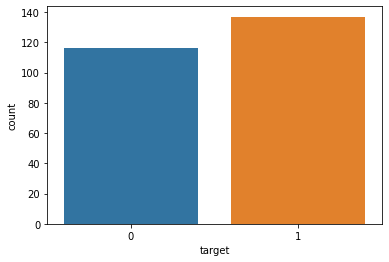

In [ ]:
htstat = sns.countplot(data['target'])

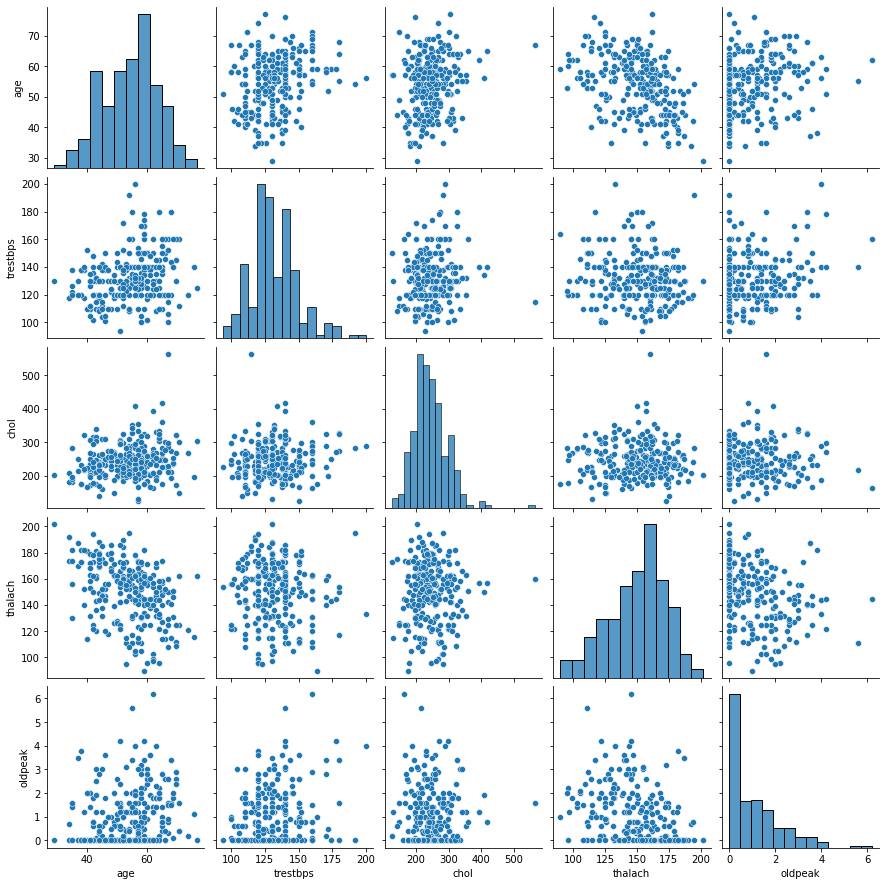

In [ ]:
dataplots = data[['age','trestbps','chol','thalach','oldpeak']]
sns.pairplot(dataplots)

In [ ]:
pos_data = data[data['target']==1]
pos_data.describe()

,ID,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.0
mean,82.970803,52.007299,0.547445,1.357664,129.167883,243.350365,0.131387,0.562044,159.372263,0.124088,0.578832,1.591241,0.343066,2.116788,1.0
std,47.033771,9.474033,0.499570,0.952838,15.553309,55.409384,0.339063,0.512510,19.007354,0.330891,0.800958,0.588552,0.843992,0.454806,0.0
min,1.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,44.000000,0.000000,1.000000,120.000000,209.000000,0.000000,0.000000,151.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,84.000000,52.000000,1.000000,2.000000,130.000000,235.000000,0.000000,1.000000,162.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,121.000000,58.000000,1.000000,2.000000,138.000000,267.000000,0.000000,1.000000,173.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,165.000000,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


In [ ]:
neg_data = data[data['target']==0]
neg_data.describe()

,ID,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.0
mean,236.448276,56.301724,0.844828,0.534483,134.956897,247.060345,0.146552,0.448276,139.500000,0.577586,1.580172,1.172414,1.103448,2.543103,0.0
std,40.719688,8.216865,0.363640,0.945755,18.723801,49.199026,0.355193,0.533158,21.684898,0.496087,1.289032,0.563774,1.041565,0.702693,0.0
min,166.000000,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,202.750000,51.750000,1.000000,0.000000,122.250000,212.000000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0
50%,238.000000,58.000000,1.000000,0.000000,131.000000,246.500000,0.000000,0.000000,141.500000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
75%,272.500000,62.000000,1.000000,1.000000,144.250000,282.000000,0.000000,1.000000,156.000000,1.000000,2.425000,2.000000,2.000000,3.000000,0.0
max,303.000000,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0


In [ ]:
print("(Positive Patients ST depression): " + str(pos_data['oldpeak'].mean()))
print("(Negative Patients ST depression): " + str(neg_data['oldpeak'].mean()))
print("(Positive Patients thalach): " + str(pos_data['thalach'].mean()))
print("(Negative Patients thalach): " + str(neg_data['thalach'].mean()))
print("(Positive Patients chestpain): " + str(pos_data['cp'].mean()))
print("(Negative Patients chestpain): " + str(neg_data['cp'].mean()))

(Positive Patients ST depression): 0.5788321167883212
(Negative Patients ST depression): 1.580172413793103
(Positive Patients thalach): 159.37226277372264
(Negative Patients thalach): 139.5
(Positive Patients chestpain): 1.3576642335766422
(Negative Patients chestpain): 0.5344827586206896


In [ ]:
slope_htstat = pd.crosstab(index = data["slope"],
                           columns = data["target"],
                           margins = True,
                           normalize = 'index')
print(slope_htstat)

target         0         1
slope                     
0       0.588235  0.411765
1       0.644068  0.355932
2       0.254237  0.745763
All     0.458498  0.541502


In [ ]:
slope_htstat = pd.crosstab(index = data["cp"],
                           columns = data["target"],
                           margins = True,
                           normalize = 'index')
print(slope_htstat)

target         0         1
cp                        
0       0.717949  0.282051
1       0.204545  0.795455
2       0.222222  0.777778
3       0.350000  0.650000
All     0.458498  0.541502


In [ ]:
slope_htstat = pd.crosstab(index = data["thalach"],
                           columns = data["target"],
                           margins = True,
                           normalize = 'index')
print(slope_htstat)

target          0         1
thalach                    
90       1.000000  0.000000
95       1.000000  0.000000
96       0.500000  0.500000
97       1.000000  0.000000
99       1.000000  0.000000
...           ...       ...
192      0.000000  1.000000
194      0.000000  1.000000
195      1.000000  0.000000
202      0.000000  1.000000
All      0.458498  0.541502

[86 rows x 2 columns]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


target
0    141.5
1    162.0
Name: thalach, dtype: float64

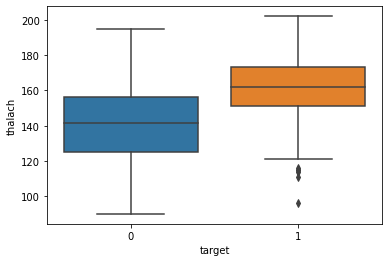

In [ ]:
sns.boxplot('target','thalach',data=data)
data.groupby('target')['thalach'].median()

In [ ]:
columnslist = list(data.columns)
print(columnslist)

['ID', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [ ]:
features = list(set(columnslist)-set(['target']))
print(features)

['slope', 'ca', 'trestbps', 'fbs', 'age', 'ID', 'oldpeak', 'chol', 'cp', 'thal', 'restecg', 'thalach', 'exang', 'sex']


In [ ]:
y = data['target'].values
print(y)

[1 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1
 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1
 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1
 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0
 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1
 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1
 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1]


In [ ]:
x = data[features].values
print(x)

[[  2.   1. 140. ... 157.   0.   0.]
 [  2.   0. 122. ... 186.   0.   1.]
 [  2.   0. 172. ... 162.   0.   1.]
 ...
 [  2.   0. 128. ... 140.   0.   1.]
 [  1.   1. 125. ... 141.   1.   1.]
 [  2.   0. 120. ... 172.   0.   1.]]


In [ ]:
dtr = DecisionTreeRegressor(max_depth=1)

In [ ]:
  split = 2*x.shape[0] // 3
  train_x, test_x = x[:split], x[split:]
  train_y, test_y = y[:split], y[split:]
  train_diffs = []
  test_diffs = []

  dtr.fit(train_x, train_y)

  predictions = dtr.predict(test_x)  
  print(predictions)
  accuracy = accuracy_score(test_y,predictions)
  print(accuracy)
  f1_score(test_y,predictions, zero_division=1)

[0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1.
 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1.]
0.9882352941176471


0.989247311827957

In [ ]:
kf = KFold(n_splits = 5, shuffle = True)
for train_indices, test_indices in kf.split(x):
  train_x, test_x = x[train_indices], x[test_indices]
  train_y, test_y = y[train_indices], y[test_indices]
dtr.fit(train_x,train_y)
predictions = dtr.predict(test_x)
print(predictions)
accuracy = accuracy_score(test_y,predictions)
print(accuracy)
f1_score(test_y, predictions, zero_division=1)

[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0.
 1. 0.]
1.0


1.0